In [ ]:
!pip install geopandas
!pip install squarify
!pip install mapclassify
!pip install factor-analyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#importing the required file
import pandas as pd
import numpy as np

from google.colab import files
  
uploaded = files.upload()

import io
 
df = pd.read_csv(io.BytesIO(uploaded['disasters.csv']))
df.head(10)

Saving disasters.csv to disasters.csv


<ipython-input-2-9a5432b6694a>:11: DtypeWarning: Columns (18,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(io.BytesIO(uploaded['disasters.csv']))


,Dis No,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,...,"Reconstruction Costs, Adjusted ('000 US$)",Insured Damages ('000 US$),"Insured Damages, Adjusted ('000 US$)",Total Damages ('000 US$),"Total Damages, Adjusted ('000 US$)",CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1900-9002-CPV,1900,9002,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.849084,NaN,NaN,NaN,NaN
1,1900-9001-IND,1900,9001,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.849084,NaN,NaN,NaN,NaN
2,1902-0012-GTM,1902,12,NaN,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,...,NaN,NaN,NaN,25000.0,843726.0,2.963048,NaN,NaN,NaN,NaN
3,1902-0003-GTM,1902,3,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,...,NaN,NaN,NaN,NaN,NaN,2.963048,NaN,NaN,NaN,NaN
4,1902-0010-GTM,1902,10,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,...,NaN,NaN,NaN,NaN,NaN,2.963048,NaN,NaN,NaN,NaN
5,1903-0006-CAN,1903,6,NaN,Natural,Geophysical,Mass movement (dry),Rockfall,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.077011,NaN,NaN,NaN,NaN
6,1903-0012-COM,1903,12,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Mount Karthala,...,NaN,NaN,NaN,NaN,NaN,3.077011,NaN,NaN,NaN,NaN
7,1904-0003-BGD,1904,3,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.077011,NaN,NaN,NaN,NaN
8,1905-0005-CAN,1905,5,NaN,Natural,Geophysical,Mass movement (dry),Rockfall,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.077011,NaN,NaN,NaN,NaN
9,1905-0003-IND,1905,3,NaN,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,...,NaN,NaN,NaN,25000.0,812477.0,3.077011,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16609 entries, 0 to 16608
Data columns (total 50 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Dis No                                     16609 non-null  object 
 1   Year                                       16609 non-null  int64  
 2   Seq                                        16609 non-null  int64  
 3   Glide                                      1728 non-null   object 
 4   Disaster Group                             16609 non-null  object 
 5   Disaster Subgroup                          16609 non-null  object 
 6   Disaster Type                              16609 non-null  object 
 7   Disaster Subtype                           13298 non-null  object 
 8   Disaster Subsubtype                        1109 non-null   object 
 9   Event Name                                 3971 non-null   object 
 10  Country               

In [ ]:
# Select and remove columns
df = df.drop(columns=['Geo Locations', 'Adm Level', 'Admin1 Code', 'Admin2 Code',
                      "Reconstruction Costs ('000 US$)", "Reconstruction Costs, Adjusted ('000 US$)", "Insured Damages ('000 US$)",
                      "Insured Damages, Adjusted ('000 US$)"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16609 entries, 0 to 16608
Data columns (total 42 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Dis No                              16609 non-null  object 
 1   Year                                16609 non-null  int64  
 2   Seq                                 16609 non-null  int64  
 3   Glide                               1728 non-null   object 
 4   Disaster Group                      16609 non-null  object 
 5   Disaster Subgroup                   16609 non-null  object 
 6   Disaster Type                       16609 non-null  object 
 7   Disaster Subtype                    13298 non-null  object 
 8   Disaster Subsubtype                 1109 non-null   object 
 9   Event Name                          3971 non-null   object 
 10  Country                             16609 non-null  object 
 11  ISO                                 16609

In [ ]:
# Create a mapping between old and new column names
new_cols = {col: col.replace(' ', '_') for col in df.columns}

# Rename the columns using the mapping
df = df.rename(columns=new_cols)
df


,Dis_No,Year,Seq,Glide,Disaster_Group,Disaster_Subgroup,Disaster_Type,Disaster_Subtype,Disaster_Subsubtype,Event_Name,...,End_Month,End_Day,Total_Deaths,No_Injured,No_Affected,No_Homeless,Total_Affected,Total_Damages_('000_US$),"Total_Damages,_Adjusted_('000_US$)",CPI
0,1900-9002-CPV,1900,9002,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,...,NaN,NaN,11000.0,NaN,NaN,NaN,NaN,NaN,NaN,2.849084
1,1900-9001-IND,1900,9001,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,...,NaN,NaN,1250000.0,NaN,NaN,NaN,NaN,NaN,NaN,2.849084
2,1902-0012-GTM,1902,12,NaN,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,...,4.0,18.0,2000.0,NaN,NaN,NaN,NaN,25000.0,843726.0,2.963048
3,1902-0003-GTM,1902,3,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,...,4.0,8.0,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,2.963048
4,1902-0010-GTM,1902,10,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,...,10.0,24.0,6000.0,NaN,NaN,NaN,NaN,NaN,NaN,2.963048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16604,2023-0110-ZMB,2023,110,NaN,Natural,Hydrological,Flood,Flash flood,NaN,NaN,...,3.0,9.0,NaN,NaN,154608.0,NaN,154608.0,NaN,NaN,NaN
16605,2023-0068-ZMB,2023,68,EP-2023-000013,Natural,Biological,Epidemic,Bacterial disease,NaN,Cholera,...,1.0,30.0,2.0,118.0,NaN,NaN,118.0,NaN,NaN,NaN
16606,2023-0095-ZWE,2023,95,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,Tropical cyclone 'Freddy',...,3.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16607,2023-0022-SRB,2023,22,NaN,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,...,1.0,20.0,2.0,NaN,210.0,NaN,210.0,NaN,NaN,NaN


In [ ]:
# Calculate the null value counts for each column
null_counts = df.isnull().sum()

# Create a mask to filter out columns with no null values
has_null_values = null_counts != 0

# Combine the null value counts and non-null value counts into a single dataframe,
# excluding columns with no null values
counts_df = pd.concat([null_counts.loc[has_null_values], df.loc[:, has_null_values].notnull().sum()], axis=1)
counts_df.columns = ['Null Values', 'Non-Null Values']

# Add a column for the column names
counts_df['Column Name'] = counts_df.index

# Reorder the columns
counts_df = counts_df[['Column Name', 'Null Values', 'Non-Null Values']]

# Print the resulting dataframe
print(counts_df)

                                                           Column Name  \
Glide                                                            Glide   
Disaster Subtype                                      Disaster Subtype   
Disaster Subsubtype                                Disaster Subsubtype   
Event Name                                                  Event Name   
Location                                                      Location   
Origin                                                          Origin   
Associated Dis                                          Associated Dis   
Associated Dis2                                        Associated Dis2   
OFDA Response                                            OFDA Response   
Appeal                                                          Appeal   
Declaration                                                Declaration   
AID Contribution ('000 US$)                AID Contribution ('000 US$)   
Dis Mag Value                         

In [ ]:
# assuming your data is stored in a dataframe named 'df'
effects = df[['Total_Deaths', 'No_Injured', 'No_Affected', 'No_Homeless', 'Total_Affected', 'Total_Damages_(\'000_US$)']].describe()

# set display.float_format to display numbers without scientific notation
pd.options.display.float_format = '{:.2f}'.format

effects


,Total_Deaths,No_Injured,No_Affected,No_Homeless,Total_Affected,Total_Damages_('000_US$)
count,11821.00,4135.00,9650.00,2466.00,12118.00,5372.00
mean,2752.76,2553.51,871002.74,72303.08,709195.79,795008.74
std,67414.81,33469.64,8403059.13,519239.98,7577177.27,5033559.29
min,1.00,1.00,1.00,3.00,1.00,2.00
25%,6.00,13.00,1250.00,555.25,658.50,9933.50
50%,19.00,50.00,10000.00,3000.00,6000.00,62550.00
75%,61.00,200.00,91941.00,17117.75,58890.50,350000.00
max,3700000.00,1800000.00,330000000.00,15850000.00,330000000.00,210000000.00


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st

def describe_disp_met(x):
    range = np.max(x) - np.min(x)
    variance = np.var(x)
    mode= st.mode(x)
    iqr = np.percentile(x, 75) - np.percentile(x, 25)
    return pd.Series({'range': range, 'variance': variance, 'mode': mode, 'iqr': iqr})

effects2 = effects.agg(describe_disp_met)
effects2

,Total_Deaths,No_Injured,No_Affected,No_Homeless,Total_Affected,Total_Damages_('000_US$)
range,3699999.00,1799999.00,329999999.00,15849997.00,329999999.00,209999998.00
variance,1488335015722.05,352218708104.59,11821680610166768.00,27201489320748.09,11830830273710900.00,4785030012525179.00
mode,11821.00,4135.00,9650.00,2466.00,12118.00,5372.00
iqr,25703.70,11427.91,2746466.84,182048.99,2421526.54,1845853.25


In [ ]:
df['Total Deaths'].corr(df['Total Affected'])

0.13677399135518079

In [ ]:
import pandas as pd
import numpy as np

# Calculate the mean and standard deviation of 'Total Deaths'
mean_deaths = df['No_Homeless'].mean()
std_deaths = df['No_Homeless'].std()

# Calculate a 95% confidence interval for the mean number of deaths
n = len(df['No_Homeless'].dropna())
z = 1.96  # for 95% confidence interval
ci_low = mean_deaths - z * std_deaths / np.sqrt(n)
ci_high = mean_deaths + z * std_deaths / np.sqrt(n)
print(f"95% confidence interval for mean Total Deaths: [{ci_low:.2f}, {ci_high:.2f}]")


95% confidence interval for mean Total Deaths: [51809.03, 92797.12]


In [ ]:
dis_subgrp_counts = df['Disaster Subgroup'].value_counts()
print(dis_subgrp_counts)


Hydrological         6599
Meteorological       5225
Geophysical          1911
Biological           1614
Climatological       1259
Extra-terrestrial       1
Name: Disaster Subgroup, dtype: int64


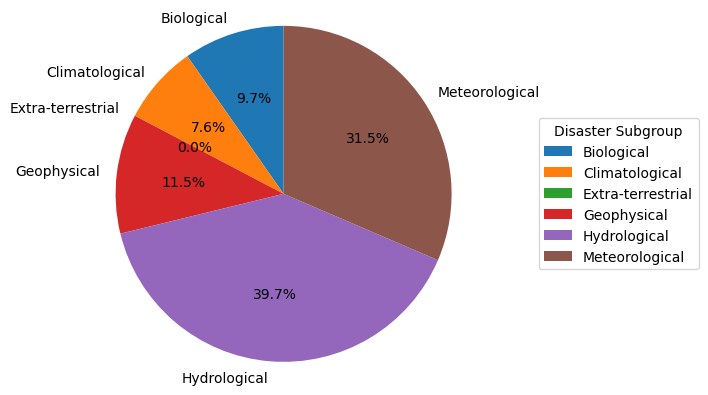

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Group data by Disaster Subgroup and get the count
counts1 = df.groupby('Disaster Subgroup').size().reset_index(name='count')

# Plot the pie chart
plt.pie(counts1['count'], labels=counts1['Disaster Subgroup'], startangle=90, autopct='%1.1f%%')
plt.axis('equal')
plt.legend(title='Disaster Subgroup', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


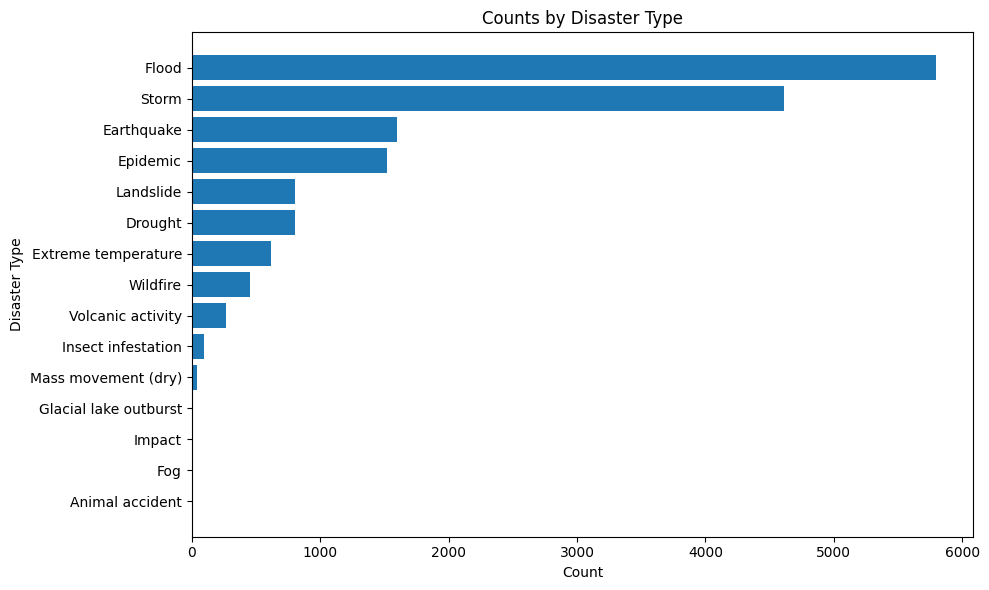

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# calculate counts by category
counts = df.groupby('Disaster Type')['Dis No'].count().reset_index()
counts.columns = ['Disaster Type', 'count']

# reorder categories based on counts
counts = counts.sort_values('count')

# plot bar chart
plt.figure(figsize=(10, 6))
plt.barh(counts['Disaster Type'], counts['count'])
plt.xlabel('Count')
plt.ylabel('Disaster Type')
plt.title('Counts by Disaster Type')
plt.tight_layout()
plt.show()


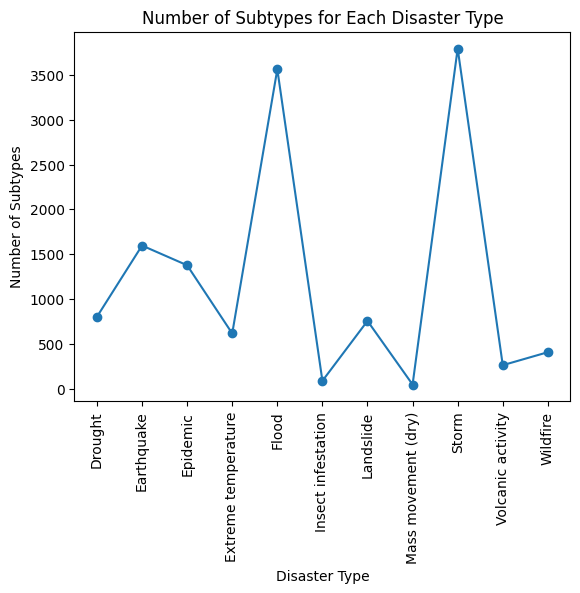

In [ ]:
import matplotlib.pyplot as plt

# Create a pivot table of disaster types and subtypes
pivot_table = df.pivot_table(index='Disaster Type', columns='Disaster Subtype', aggfunc=len, fill_value=0)['Year']

# Calculate the number of subtypes for each disaster type
num_subtypes = pivot_table.sum(axis=1)

# Create a line chart to display the number of subtypes for each disaster type
plt.plot(num_subtypes.index, num_subtypes.values, marker='o')
plt.title('Number of Subtypes for Each Disaster Type')
plt.xlabel('Disaster Type')
plt.ylabel('Number of Subtypes')
plt.xticks(rotation=90)
plt.show()


<Figure size 2000x1500 with 0 Axes>

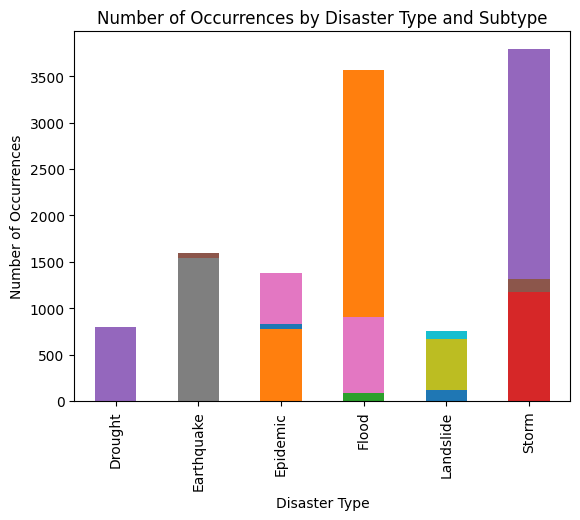

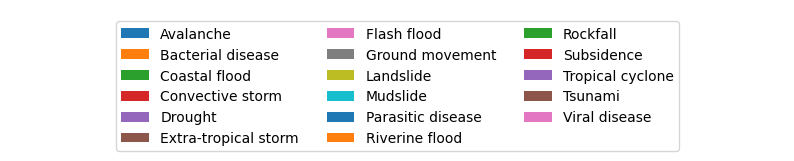

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the dataframe to include only the selected disaster types and their subtypes
selected_disasters = ['Drought', 'Epidemic', 'Earthquake', 'Flood', 'Landslide', 'Storm']
selected_df = df[df['Disaster Type'].isin(selected_disasters)]

# Create a pivot table of the number of occurrences for each subtype within each disaster type
pivot_table = selected_df.pivot_table(index='Disaster Type', columns='Disaster Subtype', aggfunc=len, fill_value=0)['Year']
plt.figure(figsize=(20, 15))

# Plot the results as a stacked bar chart
ax = pivot_table.plot(kind='bar', stacked=True, legend= False)

# Set the chart title and axis labels
ax.set_title('Number of Occurrences by Disaster Type and Subtype')
ax.set_xlabel('Disaster Type')
ax.set_ylabel('Number of Occurrences')

# Create a separate figure and axis object for the legend
fig_legend = plt.figure(figsize=(10, 1))
ax_legend = fig_legend.add_subplot(111)

# Add the legend to the separate axis object
ax_legend.legend(*ax.get_legend_handles_labels(), loc='center', ncol=3, bbox_to_anchor=(0.5, 0))

# Hide the ticks and labels on the separate axis object
ax_legend.axis('off')

# Display the chart and the legend
plt.show()


In [ ]:
#!pip install geopandas
#!pip install squarify
#!pip install mapclassify

In [ ]:
# check data availability in time ranges
range1 = df[(df['Year'] >= 1900) & (df['Year'] < 1950)]
range2 = df[(df['Year'] >= 1950) & (df['Year'] < 2000)]
range3 = df[(df['Year'] >= 2000) & (df['Year'] <= 2023)]

print(len(range1)) # number of rows in range1
print(len(range2)) # number of rows in range2
print(len(range3)) # number of rows in range3


567
6490
9552


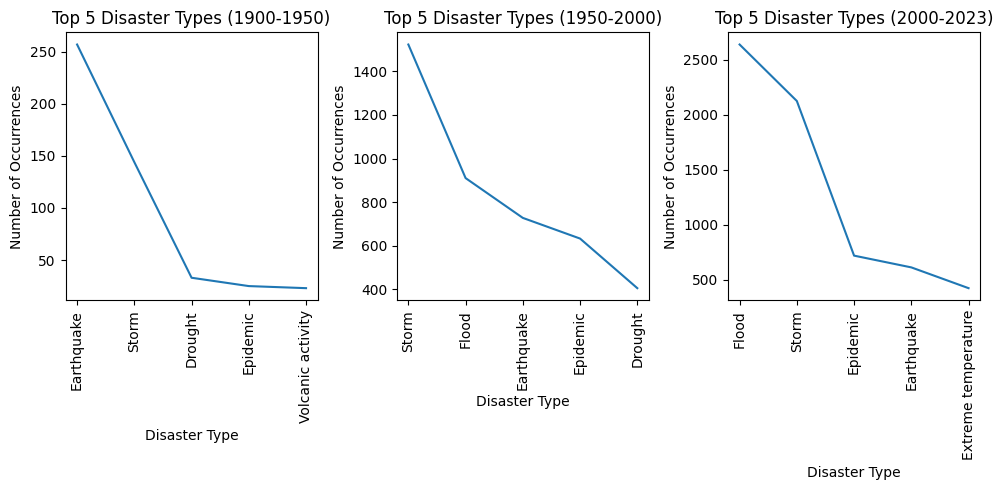

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the dataframe to include only the desired year groups
df_1900_1950 = df[(df['Year'] >= 1900) & (df['Year'] <= 1950)]
df_1950_2000 = df[(df['Year'] > 1950) & (df['Year'] <= 2000)]
df_2000_2023 = df[df['Year'] > 2000]

# Group the data by disaster type and count the number of occurrences
grouped_1900_1950 = df_1900_1950.groupby('Disaster Type')['Disaster Subtype'].count().sort_values(ascending=False)[:5]
grouped_1950_2000 = df_1950_2000.groupby('Disaster Type')['Disaster Subtype'].count().sort_values(ascending=False)[:5]
grouped_2000_2023 = df_2000_2023.groupby('Disaster Type')['Disaster Subtype'].count().sort_values(ascending=False)[:5]

# Create three line plots, one for each year group
plt.figure(figsize=(10, 5))

# Plot for 1900-1950
plt.subplot(1, 3, 1)
grouped_1900_1950.plot(kind='line')
plt.title('Top 5 Disaster Types (1900-1950)')
plt.xlabel('Disaster Type')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=90)

# Plot for 1950-2000
plt.subplot(1, 3, 2)
grouped_1950_2000.plot(kind='line')
plt.title('Top 5 Disaster Types (1950-2000)')
plt.xlabel('Disaster Type')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=90)

# Plot for 2000-2023
plt.subplot(1, 3, 3)
grouped_2000_2023.plot(kind='line')
plt.title('Top 5 Disaster Types (2000-2023)')
plt.xlabel('Disaster Type')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=90)

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()


<ipython-input-220-c6e9a3aecb55>:18: FutureWarning: The operation <built-in function sum> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.


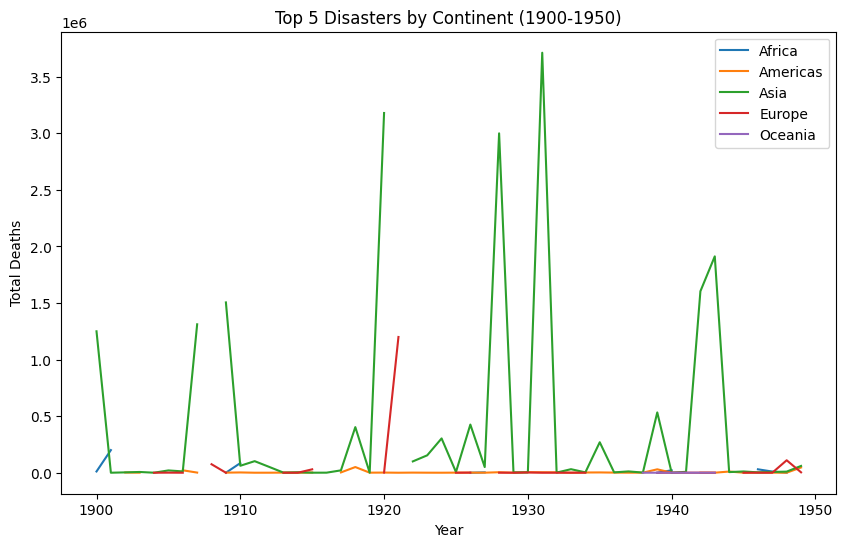

<ipython-input-220-c6e9a3aecb55>:18: FutureWarning: The operation <built-in function sum> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.


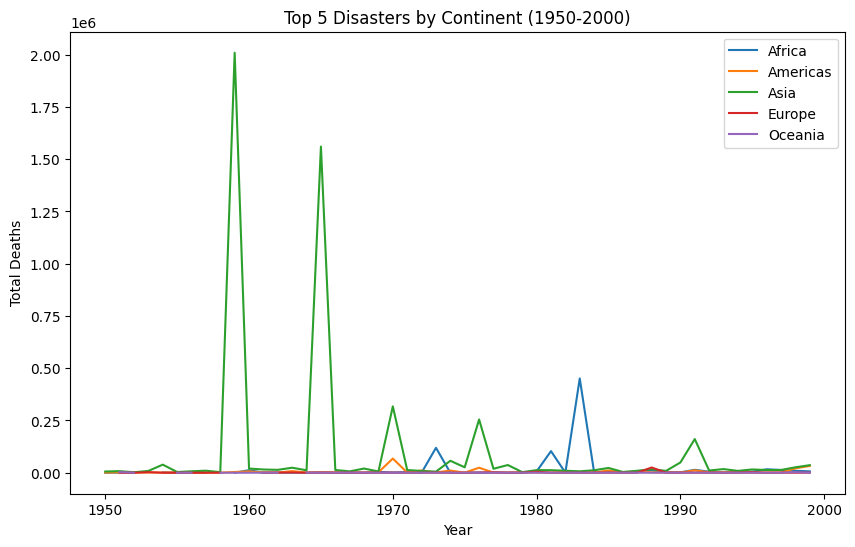

<ipython-input-220-c6e9a3aecb55>:18: FutureWarning: The operation <built-in function sum> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.


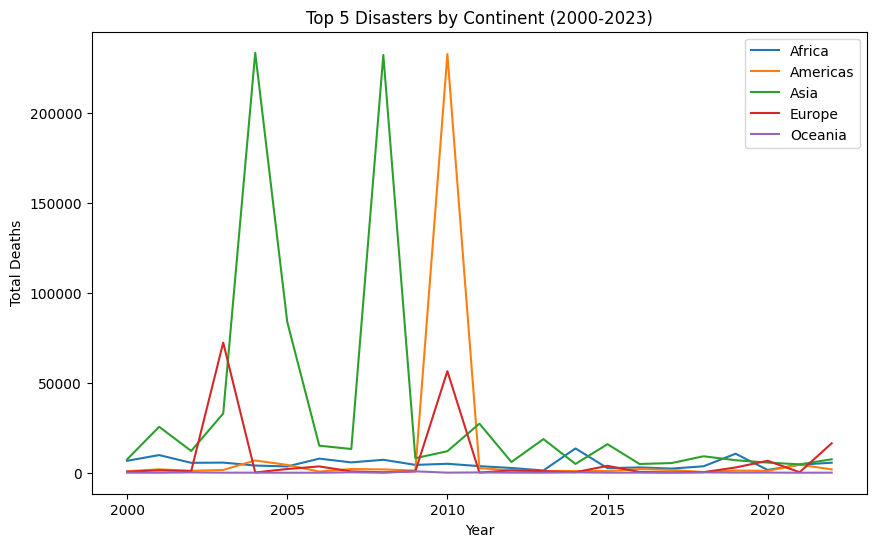

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the data for the three year groups
year_groups = [(1900, 1950), (1950, 2000), (2000, 2023)]

for i, (start_year, end_year) in enumerate(year_groups):
    # Filter the data for the given year group and the top 5 disaster types
    top_disasters = df[(df['Year'] >= start_year) & (df['Year'] < end_year)] \
        .groupby('Disaster Type').agg({'Total Deaths': 'sum'}) \
        .sort_values('Total Deaths', ascending=False) \
        .head(5) \
        .index.tolist()

    selected_df = df[(df['Year'] >= start_year) & (df['Year'] < end_year) & df['Disaster Type'].isin(top_disasters)]

    # Pivot the data to create a separate column for each continent
    pivot_table = selected_df.pivot_table(index='Year', columns='Continent', aggfunc=sum)['Total Deaths']

    # Create a line plot for each continent
    fig, ax = plt.subplots(figsize=(10, 6))
    for continent in pivot_table.columns:
        ax.plot(pivot_table.index, pivot_table[continent], label=continent)

    # Set the chart title and axis labels
    plt.title(f'Top 5 Disasters by Continent ({start_year}-{end_year})')
    plt.xlabel('Year')
    plt.ylabel('Total Deaths')

    # Add a legend and display the chart
    ax.legend()
    plt.show()


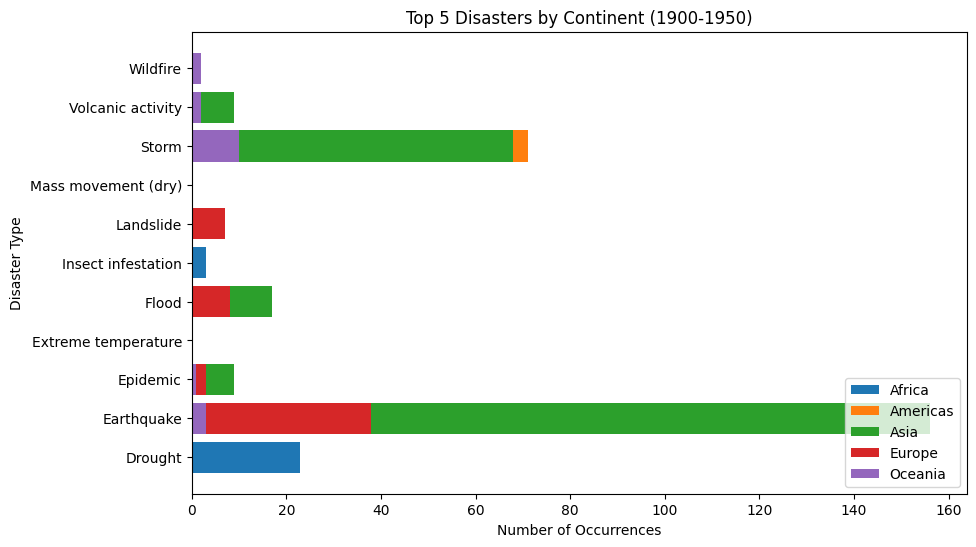

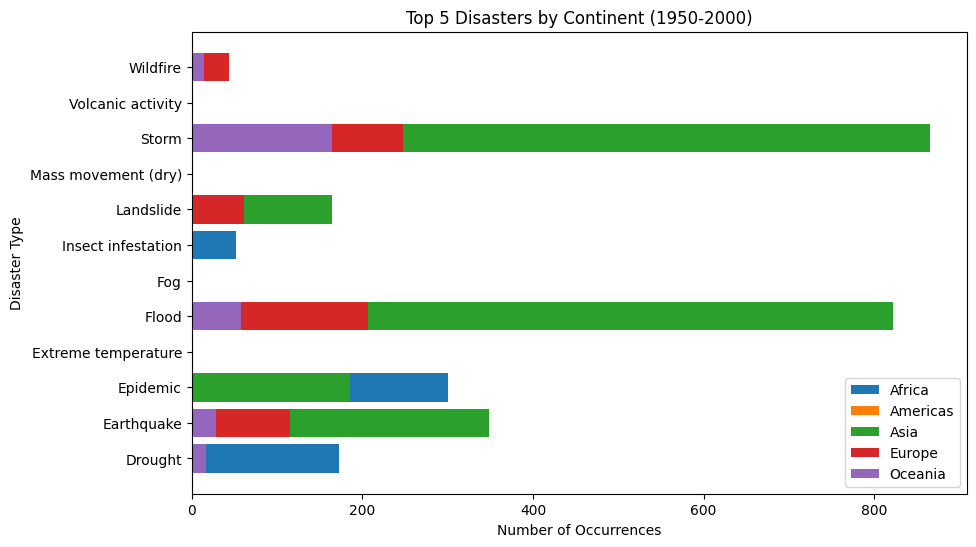

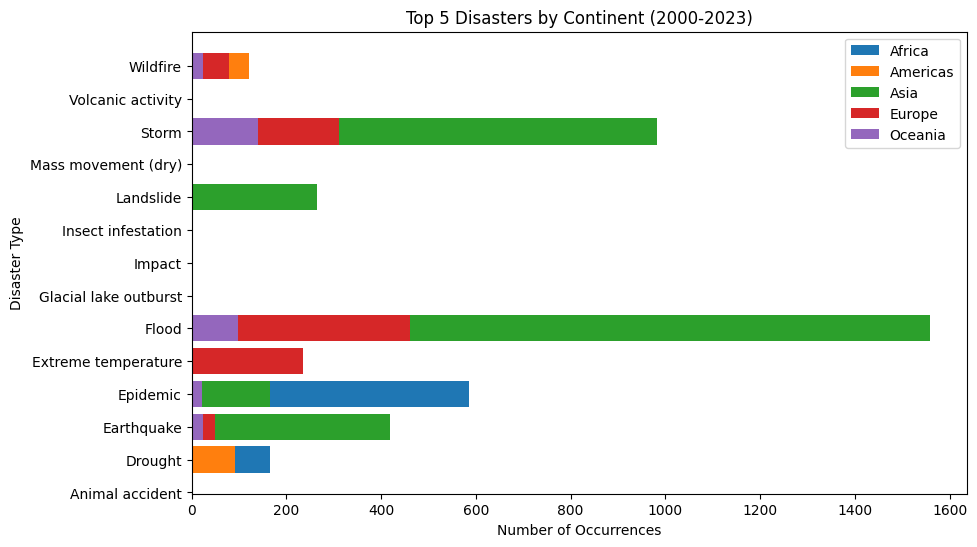

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the data for the three year groups
year_groups = [(1900, 1950), (1950, 2000), (2000, 2023)]

for i, (start_year, end_year) in enumerate(year_groups):
    # Filter the data for the given year group
    selected_df = df[(df['Year'] >= start_year) & (df['Year'] < end_year)]

    # Group the data by disaster type and continent, and calculate the number of occurrences
    pivot_table = selected_df.groupby(['Disaster Type', 'Continent']).size().unstack()

    # Keep only the top 5 disasters for each continent
    for continent in pivot_table.columns:
        pivot_table[continent] = pivot_table[continent].nlargest(5)

    # Create a horizontal bar chart for each continent
    fig, ax = plt.subplots(figsize=(10, 6))
    for continent in pivot_table.columns:
        ax.barh(pivot_table.index, pivot_table[continent], label=continent)

    # Set the chart title and axis labels
    plt.title(f'Top 5 Disasters by Continent ({start_year}-{end_year})')
    plt.xlabel('Number of Occurrences')
    plt.ylabel('Disaster Type')

    # Add a legend and display the chart
    ax.legend()
    plt.show()


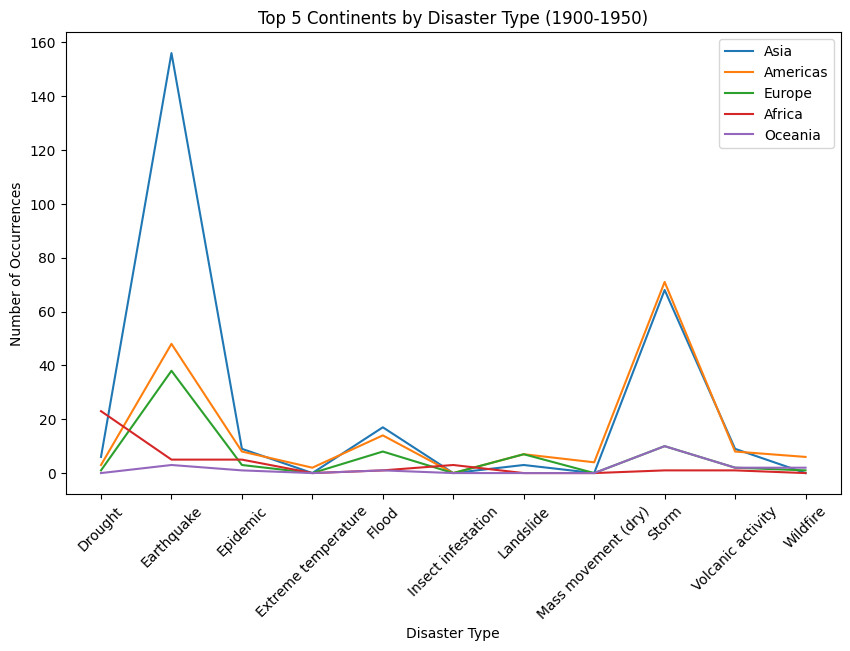

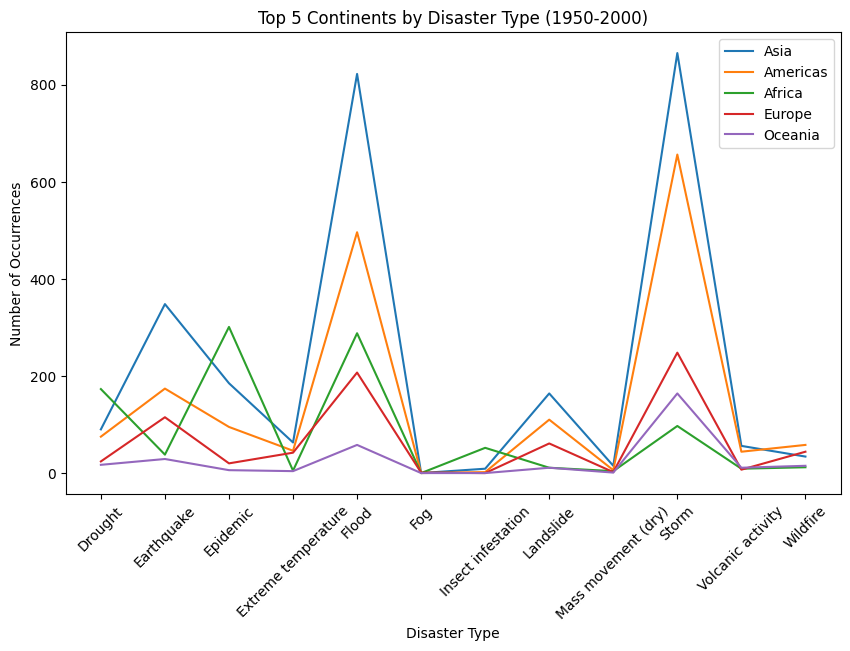

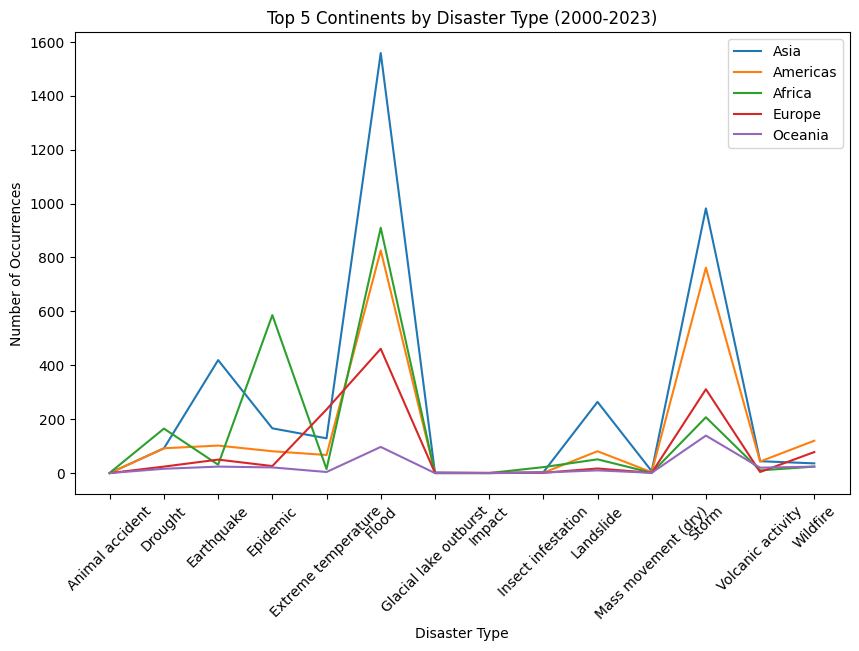

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the data for the three year groups
year_groups = [(1900, 1950), (1950, 2000), (2000, 2023)]

for i, (start_year, end_year) in enumerate(year_groups):
    # Filter the data for the given year group
    selected_df = df[(df['Year'] >= start_year) & (df['Year'] < end_year)]

    # Get the top 5 continents based on the number of occurrences in the selected year range
    top_continents = selected_df['Continent'].value_counts().nlargest(5).index.tolist()

    # Pivot the data to create a separate column for each continent
    pivot_table = selected_df.pivot_table(index='Disaster Type', columns='Continent', aggfunc=len, fill_value=0)['Year']

    # Create a line plot for each continent
    fig, ax = plt.subplots(figsize=(10, 6))
    for continent in top_continents:
        ax.plot(pivot_table.index, pivot_table[continent], label=continent)

    # Set the chart title and axis labels
    plt.title(f'Top 5 Continents by Disaster Type ({start_year}-{end_year})')
    plt.xlabel('Disaster Type')
    plt.ylabel('Number of Occurrences')

    # Add a legend and display the chart
    ax.legend()
    plt.xticks(rotation=45)
    plt.show()


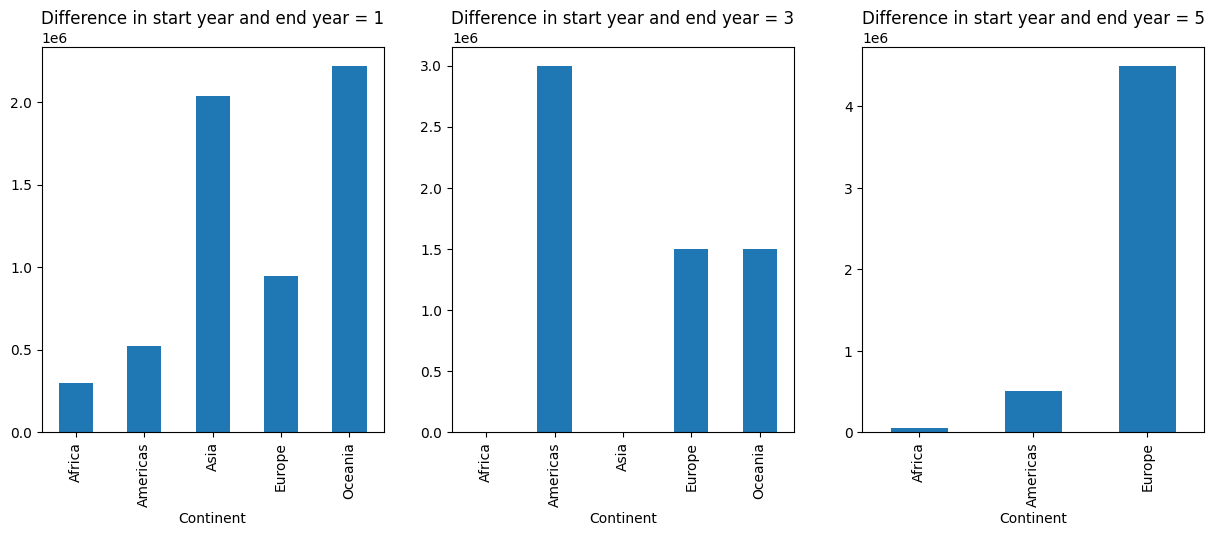

In [ ]:
import matplotlib.pyplot as plt

# Filter the dataset to include only disasters that lasted for more than one year
df_long_disasters = df[(df['End Year'] - df['Start Year']) >= 5]

# Group the resulting dataset by continent
grouped = df_long_disasters.groupby('Continent')

# Create subplots for each difference in start year and end year
fig, axs = plt.subplots(1, 3, figsize=(15,5))

# Subplot for difference in start year and end year being 1
axs[0].set_title("Difference in start year and end year = 1")
df[(df['End Year'] - df['Start Year']) == 1].groupby('Continent')["Total Damages ('000 US$)"].mean().plot(kind='bar', ax=axs[0])

# Subplot for difference in start year and end year being 3
axs[1].set_title("Difference in start year and end year = 3")
df[(df['End Year'] - df['Start Year']) == 3].groupby('Continent')["Total Damages ('000 US$)"].mean().plot(kind='bar', ax=axs[1])

# Subplot for difference in start year and end year being 5
axs[2].set_title("Difference in start year and end year = 5")
damages_by_continent.plot(kind='bar', ax=axs[2])

# Display the subplots
plt.show()



<ipython-input-224-8ad5da2c4cf5>:19: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
/usr/local/lib/python3.10/dist-packages/mapclassify/classifiers.py:255: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 2.


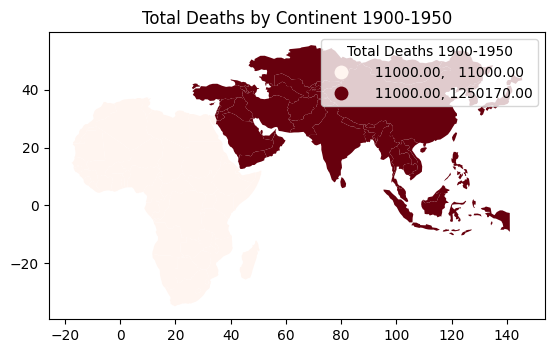

<ipython-input-224-8ad5da2c4cf5>:19: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
/usr/local/lib/python3.10/dist-packages/mapclassify/classifiers.py:255: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 2.


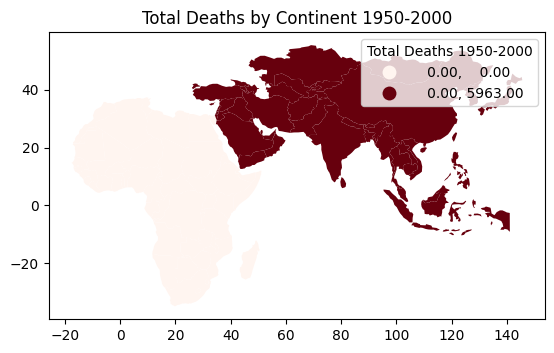

<ipython-input-224-8ad5da2c4cf5>:19: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
/usr/local/lib/python3.10/dist-packages/mapclassify/classifiers.py:255: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 3.


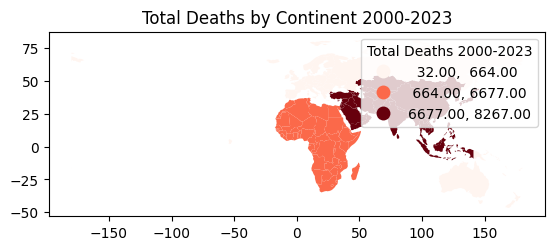

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Create a list of year ranges
year_ranges = [(1900, 1950), (1950, 2000), (2000, 2023)]

# Loop through the year ranges and plot the data for each range
for i, (start_year, end_year) in enumerate(year_ranges):
    # Subset the data for the current year range
    year_range_data = df[(df['Year'] >= start_year) & (df['Year'] < end_year)]
    
    # Group the data by continent and year and sum the total deaths
    continent_year_deaths = year_range_data.groupby(['Continent', 'Year'])['Total Deaths'].sum().reset_index()

    # Pivot the data to create a table with continents as rows, years as columns, and total deaths as values
    deaths_pivot = continent_year_deaths.pivot(index='Continent', columns='Year', values='Total Deaths')

    # Plot the data on a world map using a Mercator projection
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    world = world.merge(deaths_pivot, left_on='continent', right_index=True)
    ax = world.plot(column=start_year, cmap='Reds', scheme='quantiles', k=5, legend=True, legend_kwds={'title': f'Total Deaths {start_year}-{end_year}'})
    ax.set_title(f'Total Deaths by Continent {start_year}-{end_year}')
    plt.show()


<ipython-input-225-5e6dc860a395>:12: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.


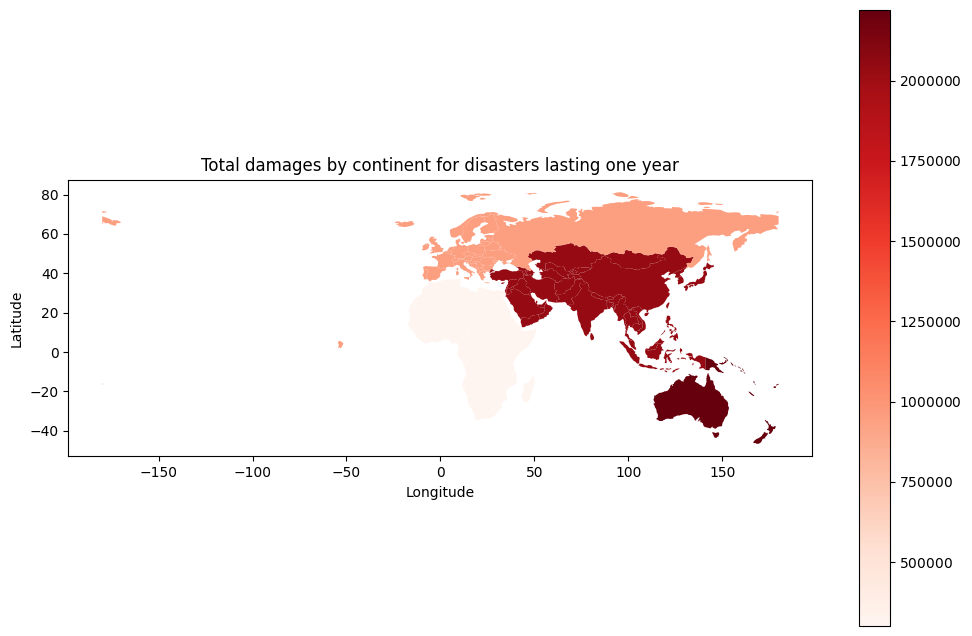

<ipython-input-225-5e6dc860a395>:37: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.


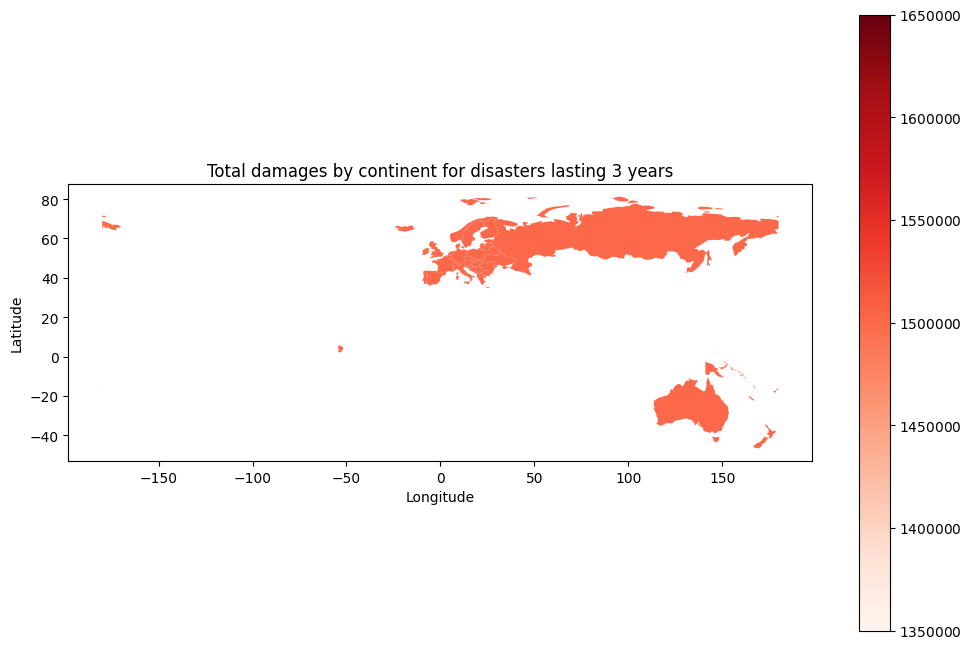

<ipython-input-225-5e6dc860a395>:61: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.


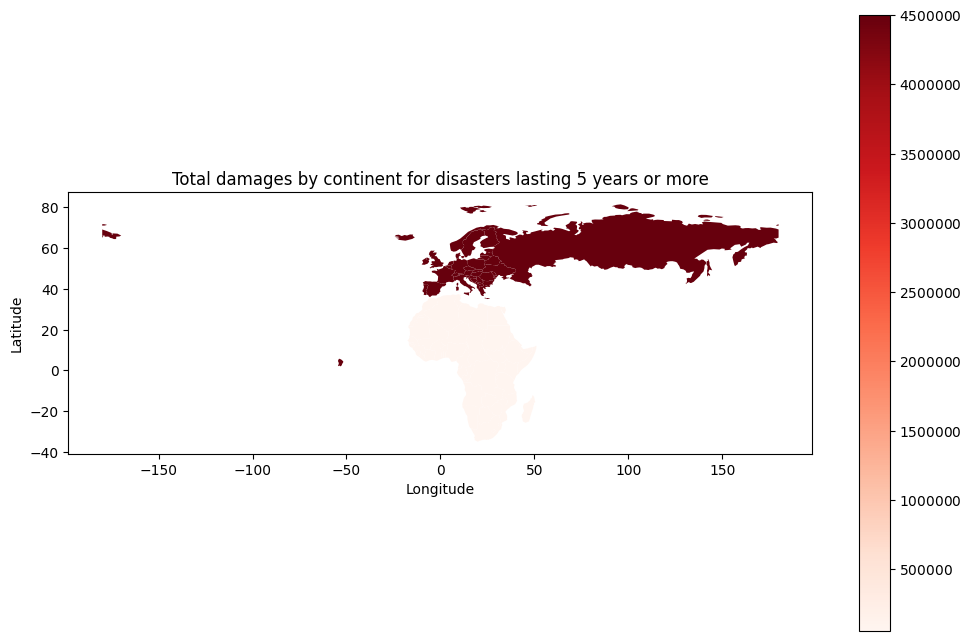

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Filter the dataset to include only disasters that lasted for more than one year
df_long_disasters = df[(df['End Year'] - df['Start Year']) == 1]

# Group the resulting dataset by continent and calculate the mean total damages
damages_by_continent = df_long_disasters.groupby('Continent')["Total Damages ('000 US$)"].mean()

# Load the world map data and plot the choropleth map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
merged = world.merge(damages_by_continent, left_on='continent', right_on='Continent')
ax = merged.plot(column='Total Damages (\'000 US$)', cmap='Reds', legend=False, figsize=(12, 8))

# Set the title and axis labels
ax.set_title('Total damages by continent for disasters lasting one year')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Set a custom formatter for the colorbar to display the original values instead of scientific notation
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(False)
ax.get_figure().colorbar(ax.collections[0], format=formatter)

# Show the plot
plt.show()

########################################
# Filter the dataset to include only disasters that lasted for more than one year
df_long_disasters = df[(df['End Year'] - df['Start Year']) == 3]

# Group the resulting dataset by continent and calculate the mean total damages
damages_by_continent = df_long_disasters.groupby('Continent')["Total Damages ('000 US$)"].mean()

# Load the world map data and plot the choropleth map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
merged = world.merge(damages_by_continent, left_on='continent', right_on='Continent')
ax = merged.plot(column='Total Damages (\'000 US$)', cmap='Reds', legend=False, figsize=(12, 8))

# Set the title and axis labels
ax.set_title('Total damages by continent for disasters lasting 3 years')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Set a custom formatter for the colorbar to display the original values instead of scientific notation
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(False)
ax.get_figure().colorbar(ax.collections[0], format=formatter)

# Show the plot
plt.show()
#####################################################
# Filter the dataset to include only disasters that lasted for more than one year
df_long_disasters = df[(df['End Year'] - df['Start Year']) >= 5]

# Group the resulting dataset by continent and calculate the mean total damages
damages_by_continent = df_long_disasters.groupby('Continent')["Total Damages ('000 US$)"].mean()

# Load the world map data and plot the choropleth map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
merged = world.merge(damages_by_continent, left_on='continent', right_on='Continent')
ax = merged.plot(column='Total Damages (\'000 US$)', cmap='Reds', legend=False, figsize=(12, 8))

# Set the title and axis labels
ax.set_title('Total damages by continent for disasters lasting 5 years or more')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Set a custom formatter for the colorbar to display the original values instead of scientific notation
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(False)
ax.get_figure().colorbar(ax.collections[0], format=formatter)

# Show the plot
plt.show()


In [ ]:
import pandas as pd

import pandas as pd

# select the columns of interest
cols = ['Total Deaths', 'No Injured', 'No Affected', 'No Homeless', 'Total Affected', 'Total Damages (\'000 US$)']

# calculate descriptive statistics
desc_stats = pd.DataFrame({
    'count': df[cols].count(),
    'mean': df[cols].mean(),
    'std': df[cols].std(),
    'min': df[cols].min(),
    '25%': df[cols].quantile(0.25),
    '50%': df[cols].quantile(0.5),
    '75%': df[cols].quantile(0.75),
    'max': df[cols].max()
})

# display the table
print(desc_stats)

                          count           mean           std  min      25%  \
Total Deaths              11821    2752.756197  6.741481e+04  1.0     6.00   
No Injured                 4135    2553.510762  3.346964e+04  1.0    13.00   
No Affected                9650  871002.744767  8.403059e+06  1.0  1250.00   
No Homeless                2466   72303.075020  5.192400e+05  3.0   555.25   
Total Affected            12118  709195.794438  7.577177e+06  1.0   658.50   
Total Damages ('000 US$)   5372  795008.739389  5.033559e+06  2.0  9933.50   

                              50%        75%          max  
Total Deaths                 19.0      61.00    3700000.0  
No Injured                   50.0     200.00    1800000.0  
No Affected               10000.0   91941.00  330000000.0  
No Homeless                3000.0   17117.75   15850000.0  
Total Affected             6000.0   58890.50  330000000.0  
Total Damages ('000 US$)  62550.0  350000.00  210000000.0  


This code filters the data for the two time periods of interest and groups it by continent to calculate the total number of deaths for each time period. It then performs a two-sample t-test for each continent to compare the number of deaths between the two time periods. The equal_var=False argument is used to perform a Welch's t-test, which does not assume equal variances between the two groups.

The output will show the t-statistic and p-value for each continent. If the p-value is less than the chosen significance level (e.g. 0.05), we can reject the null hypothesis and conclude that there is a significant difference in the number of deaths between the two time periods for that continent.

This code performs t-tests for each continent to compare the number of deaths in the two time periods of interest, and prints the t-statistic and p-value for each test.


In [ ]:
import scipy.stats as stats
from scipy.stats import ttest_ind

# Filter the data for the two time periods of interest
range1 = df[(df['Year'] >= 1950) & (df['Year'] < 2000)]
range2 = df[(df['Year'] >= 2000) & (df['Year'] <= 2023)]

# Group the data by continent and calculate the total number of deaths for each time period
range1_by_continent = range1.groupby('Continent')['Total Deaths'].sum()
range2_by_continent = range2.groupby('Continent')['Total Deaths'].sum()

# Perform t-tests for each continent to compare the number of deaths in the two time periods
for continent in range1_by_continent.index:
    range1_deaths = range1[range1['Continent']==continent]['Total Deaths']
    range2_deaths = range2[range2['Continent']==continent]['Total Deaths']
    t_stat, p_val = ttest_ind(range1_deaths, range2_deaths, equal_var=False, nan_policy='omit')
    print(f"{continent}: t-statistic = {t_stat:.3f}, p-value = {p_val:.4f}")


Africa: t-statistic = 2.061, p-value = 0.0397
Americas: t-statistic = 0.448, p-value = 0.6540
Asia: t-statistic = 1.722, p-value = 0.0852
Europe: t-statistic = -0.981, p-value = 0.3267
Oceania: t-statistic = 1.894, p-value = 0.0599


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16609 entries, 0 to 16608
Data columns (total 50 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Dis_No                                     16609 non-null  object 
 1   Year                                       16609 non-null  int64  
 2   Seq                                        16609 non-null  int64  
 3   Glide                                      1728 non-null   object 
 4   Disaster_Group                             16609 non-null  object 
 5   Disaster_Subgroup                          16609 non-null  object 
 6   Disaster_Type                              16609 non-null  object 
 7   Disaster_Subtype                           13298 non-null  object 
 8   Disaster_Subsubtype                        1109 non-null   object 
 9   Event_Name                                 3971 non-null   object 
 10  Country               

In [ ]:

df[['Start_Year', 'Start_Month', 'Start_Day', 'End_Year', 'End_Month', 'End_Day']]

,Start_Year,Start_Month,Start_Day,End_Year,End_Month,End_Day
0,1900,NaN,NaN,1900,NaN,NaN
1,1900,NaN,NaN,1900,NaN,NaN
2,1902,4.0,18.0,1902,4.0,18.0
3,1902,4.0,8.0,1902,4.0,8.0
4,1902,10.0,24.0,1902,10.0,24.0
...,...,...,...,...,...,...
16604,2023,2.0,7.0,2023,3.0,9.0
16605,2023,1.0,21.0,2023,1.0,30.0
16606,2023,2.0,24.0,2023,3.0,8.0
16607,2023,1.0,18.0,2023,1.0,20.0


In [ ]:
# Substitute missing values in the columns with 1
# = df[['Start_Year', 'Start_Month', 'Start_Day', 'End_Year', 'End_Month', 'End_Day']].fillna(1)

start_cols = ['Start_Year', 'Start_Month', 'Start_Day']
end_cols = ['End_Year', 'End_Month', 'End_Day']

In [ ]:
start_dates = pd.to_datetime(df[start_cols].rename(columns={'Start_Year': 'year', 'Start_Month': 'month', 'Start_Day': 'day'}))

In [ ]:
start_dates

0              NaT
1              NaT
2       1902-04-18
3       1902-04-08
4       1902-10-24
           ...    
16604   2023-02-07
16605   2023-01-21
16606   2023-02-24
16607   2023-01-18
16608   2023-02-22
Length: 16609, dtype: datetime64[ns]

In [ ]:
df['start_dates']=start_dates

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16609 entries, 0 to 16608
Data columns (total 51 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Dis_No                                     16609 non-null  object        
 1   Year                                       16609 non-null  int64         
 2   Seq                                        16609 non-null  int64         
 3   Glide                                      1728 non-null   object        
 4   Disaster_Group                             16609 non-null  object        
 5   Disaster_Subgroup                          16609 non-null  object        
 6   Disaster_Type                              16609 non-null  object        
 7   Disaster_Subtype                           13298 non-null  object        
 8   Disaster_Subsubtype                        1109 non-null   object        
 9   Event_Name       

In [ ]:
end_dates = pd.to_datetime(df[end_cols].rename(columns={'End_Year': 'year', 'End_Month': 'month', 'End_Day': 'day'}))

In [ ]:
df['end_dates']=end_dates

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16609 entries, 0 to 16608
Data columns (total 52 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Dis_No                                     16609 non-null  object        
 1   Year                                       16609 non-null  int64         
 2   Seq                                        16609 non-null  int64         
 3   Glide                                      1728 non-null   object        
 4   Disaster_Group                             16609 non-null  object        
 5   Disaster_Subgroup                          16609 non-null  object        
 6   Disaster_Type                              16609 non-null  object        
 7   Disaster_Subtype                           13298 non-null  object        
 8   Disaster_Subsubtype                        1109 non-null   object        
 9   Event_Name       

In [ ]:
end_dates

0              NaT
1              NaT
2       1902-04-18
3       1902-04-08
4       1902-10-24
           ...    
16604   2023-03-09
16605   2023-01-30
16606   2023-03-08
16607   2023-01-20
16608   2023-03-10
Length: 16609, dtype: datetime64[ns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16609 entries, 0 to 16608
Data columns (total 52 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Dis_No                                     16609 non-null  object        
 1   Year                                       16609 non-null  int64         
 2   Seq                                        16609 non-null  int64         
 3   Glide                                      1728 non-null   object        
 4   Disaster_Group                             16609 non-null  object        
 5   Disaster_Subgroup                          16609 non-null  object        
 6   Disaster_Type                              16609 non-null  object        
 7   Disaster_Subtype                           13298 non-null  object        
 8   Disaster_Subsubtype                        1109 non-null   object        
 9   Event_Name       

In [ ]:
# Calculate the duration of each disaster in days
df['Duration'] = (end_dates - start_dates).dt.days

# Print the resulting dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16609 entries, 0 to 16608
Data columns (total 53 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Dis_No                                     16609 non-null  object        
 1   Year                                       16609 non-null  int64         
 2   Seq                                        16609 non-null  int64         
 3   Glide                                      1728 non-null   object        
 4   Disaster_Group                             16609 non-null  object        
 5   Disaster_Subgroup                          16609 non-null  object        
 6   Disaster_Type                              16609 non-null  object        
 7   Disaster_Subtype                           13298 non-null  object        
 8   Disaster_Subsubtype                        1109 non-null   object        
 9   Event_Name       

In [ ]:
df['Duration'].mean()


8.37128443927047

In [ ]:
scale_counts = df['Dis_Mag_Scale'].value_counts(dropna=False)
scale_counts



Km2           7053
Kph           4609
Richter       1596
Vaccinated    1518
NaN           1218
°C             615
Name: Dis_Mag_Scale, dtype: int64

<ipython-input-326-a8612c7e9c76>:11: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


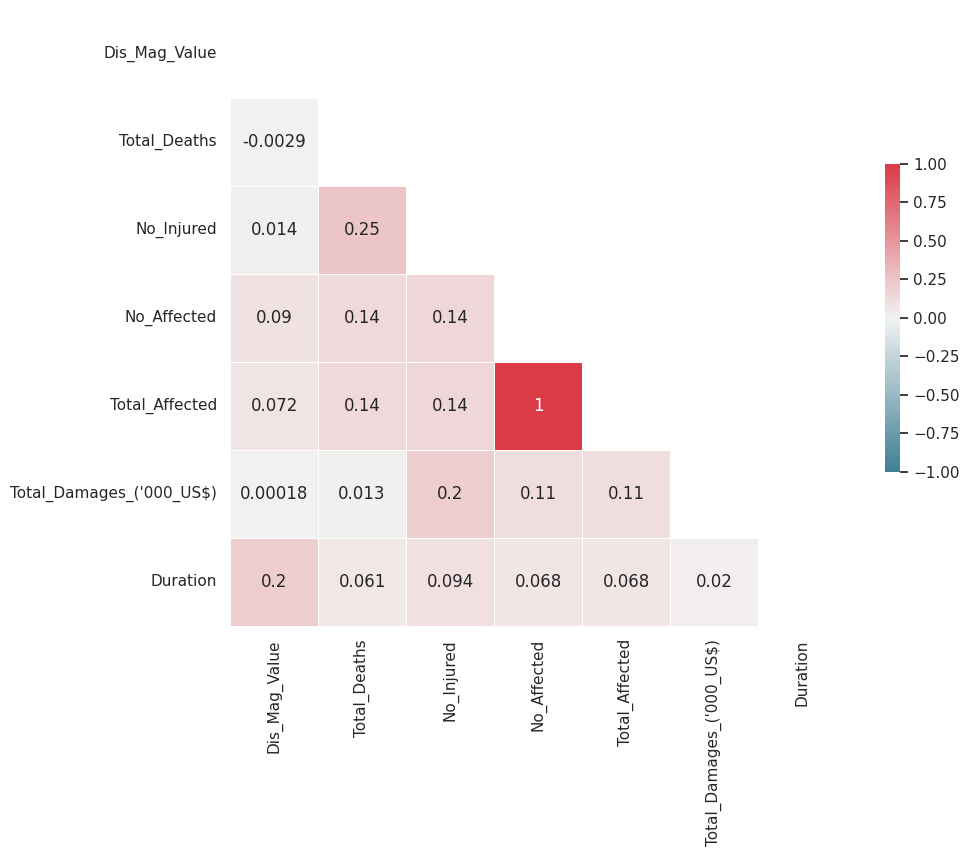

In [ ]:
import seaborn as sns

# select the columns for analysis
cols = ['Dis_Mag_Value', 'Total_Deaths', 'No_Injured', 'No_Affected', 'Total_Affected', 'Total_Damages_(\'000_US$)', 'Duration']

# calculate the correlation matrix
corr = df[cols].corr()

# plot the correlation matrix using seaborn heatmap
sns.set(style='white')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10, 8))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, annot= True,cmap=cmap, vmax=1, vmin=-1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()


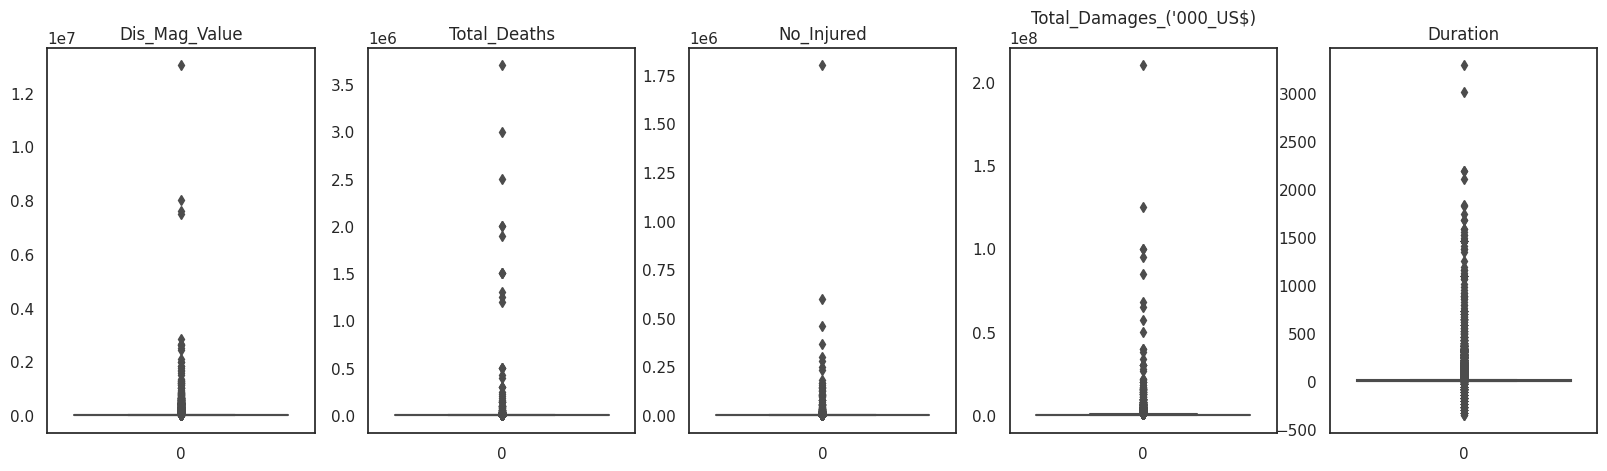

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# select the columns for analysis
cols = ['Dis_Mag_Value', 'Total_Deaths', 'No_Injured', 'Total_Damages_(\'000_US$)', 'Duration']

# create a box plot for each column
fig, axs = plt.subplots(ncols=len(cols), figsize=(20,5))
for i, col in enumerate(cols):
    sns.boxplot(data=df[col], ax=axs[i])
    axs[i].set_title(col)

plt.show()


In [ ]:
import statsmodels.api as sm

# select the columns for analysis
cols = ['Dis_Mag_Value', 'Total_Deaths', 'No_Injured', 'Total_Damages_(\'000_US$)', 'Duration']

# create a copy of the dataframe with only the selected columns
data = df[cols].copy()

# drop any rows with missing values
data.dropna(inplace=True)

# create the X (independent) and y (dependent) variables
X = data.drop('Total_Damages_(\'000_US$)', axis=1)
y = data['Total_Damages_(\'000_US$)']

# add a constant to the X matrix
X = sm.add_constant(X)

# fit the multiple regression model
model = sm.OLS(y, X).fit()

# print the model summary
print(model.summary())


                               OLS Regression Results                               
Dep. Variable:     Total_Damages_('000_US$)   R-squared:                       0.072
Model:                                  OLS   Adj. R-squared:                  0.068
Method:                       Least Squares   F-statistic:                     19.13
Date:                      Sun, 07 May 2023   Prob (F-statistic):           3.59e-15
Time:                              06:05:36   Log-Likelihood:                -17314.
No. Observations:                       995   AIC:                         3.464e+04
Df Residuals:                           990   BIC:                         3.466e+04
Df Model:                                 4                                         
Covariance Type:                  nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

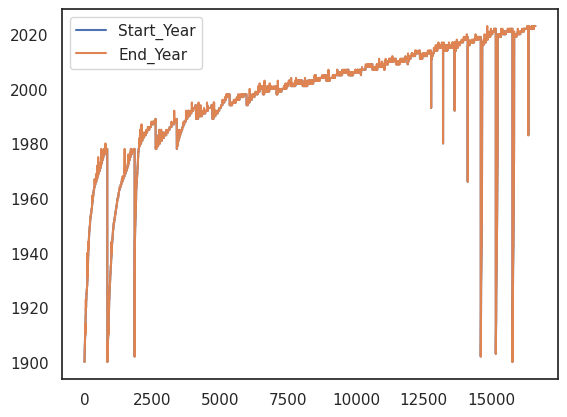

Column 1 - ADF Statistic: -6.845345095029462
Column 1 - p-value: 1.7485991219170595e-09
Column 1 - Critical Values: {'1%': -3.430743899737975, '5%': -2.8617140878790672, '10%': -2.5668626625617983}


Column 2 - ADF Statistic: -6.839051689275928
Column 2 - p-value: 1.8109145542914245e-09
Column 2 - Critical Values: {'1%': -3.430743899737975, '5%': -2.8617140878790672, '10%': -2.5668626625617983}


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Select the two columns to analyze
col1 = df['Start_Year']
col2 = df['End_Year']

# Plot the two columns as time series
plt.plot(col1, label='Start_Year')
plt.plot(col2, label='End_Year')
plt.legend()
plt.show()

# Perform the ADF test on both columns
result1 = adfuller(col1)
result2 = adfuller(col2)

# Print the ADF test results
print(f'Column 1 - ADF Statistic: {result1[0]}')
print(f'Column 1 - p-value: {result1[1]}')
print(f'Column 1 - Critical Values: {result1[4]}')
print('\n')
print(f'Column 2 - ADF Statistic: {result2[0]}')
print(f'Column 2 - p-value: {result2[1]}')
print(f'Column 2 - Critical Values: {result2[4]}')


In [ ]:
!pip install statsmodels==0.12.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 53.4 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Installing build dependencies ... error
error: subprocess-exited-with-error

× pip subprocess to install build dependencies did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [ ]:
from statsmodels.tsa.stattools import kpss

start_year = df['Start_Year'].values
end_year = df['End_Year'].values

kpss_stat_start, p_value_start, lags_start, critical_values_start = kpss(start_year)
kpss_stat_end, p_value_end, lags_end, critical_values_end = kpss(end_year)

print('KPSS Statistic (Start_Year):', kpss_stat_start)
print('p-value (Start_Year):', p_value_start)
print('KPSS Statistic (End_Year):', kpss_stat_end)
print('p-value (End_Year):', p_value_end)
print('Critical Values:', critical_values_start)



KPSS Statistic (Start_Year): 14.822428396299921
p-value (Start_Year): 0.01
KPSS Statistic (End_Year): 14.830353919050905
p-value (End_Year): 0.01
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16609 entries, 0 to 16608
Data columns (total 53 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Dis_No                                     16609 non-null  object        
 1   Year                                       16609 non-null  int64         
 2   Seq                                        16609 non-null  int64         
 3   Glide                                      1728 non-null   object        
 4   Disaster_Group                             16609 non-null  object        
 5   Disaster_Subgroup                          16609 non-null  object        
 6   Disaster_Type                              0 non-null      float64       
 7   Disaster_Subtype                           13298 non-null  object        
 8   Disaster_Subsubtype                        1109 non-null   object        
 9   Event_Name       

In [ ]:
from scipy.stats import chi2_contingency

# create a contingency table of the two categorical variables
contingency_table = pd.crosstab(df['Disaster_Type'], df['Continent'])

# run chi-square test on the contingency table
chi2, p, dof, expected = chi2_contingency(contingency_table)

# print the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")


Chi-square statistic: 4312.375361568786
P-value: 0.0
Degrees of freedom: 56


In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests
import pandas as pd

# assuming your data is stored in a dataframe named 'df'
# with columns 'Total_Deaths' and 'Start_Year'
data = pd.concat([df['Total_Deaths'], df['Start_Year']], axis=1)

# perform Granger causality test with maximum lag of 1
results = grangercausalitytests(data, maxlag=1)

# print the F-statistics and p-values for each lag
for lag in range(1, 2):
    print(f'Lag {lag}: F-statistic = {results[lag][0]["params_ftest"][0]:.2f}, p-value = {results[lag][0]["params_ftest"][1]:.2f}')


ValueError: ignored

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests
import pandas as pd
import numpy as np

# assuming your data is stored in a dataframe named 'df'
# with columns 'X' and 'Y'
data = pd.concat([df['Total_Deaths'], df['Start_Year']], axis=1)

# remove rows containing NaN or inf values
data = data.replace([np.inf, -np.inf], np.nan).dropna()

# perform Granger causality test with maximum lag of 1
results = grangercausalitytests(data, maxlag=1)

# print the F-statistics and p-values for each lag
for lag in range(1, 3):
    print(f'Lag {lag}: F-statistic = {results[lag][0]["params_F"][0]:.2f}, p-value = {results[lag][0]["ssr_ftest"][1]:.2f}')



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=153.5034, p=0.0000  , df_denom=11817, df_num=1
ssr based chi2 test:   chi2=153.5424, p=0.0000  , df=1
likelihood ratio test: chi2=152.5537, p=0.0000  , df=1
parameter F test:         F=153.5034, p=0.0000  , df_denom=11817, df_num=1


KeyError: ignored

In [ ]:
ct=df['Continent'].unique()
print(ct)

['Africa' 'Asia' 'Americas' 'Europe' 'Oceania']


In [ ]:
import pandas as pd

# create dummy variables for the 'Continent' column
dummy_df = pd.get_dummies(df['Continent'])

# concatenate the original DataFrame with the dummy variables
df = pd.concat([df, dummy_df], axis=1)

import statsmodels.api as sm

# fit an ARIMA model to the 'Start_Year' time series data
model = sm.tsa.ARIMA(df['Start_Year'], order=(1, 1, 1))
results = model.fit()

# print the model summary
print(results.summary())


                               SARIMAX Results                                
Dep. Variable:             Start_Year   No. Observations:                16609
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -35700.992
Date:                Sun, 07 May 2023   AIC                          71407.984
Time:                        08:53:57   BIC                          71431.137
Sample:                             0   HQIC                         71415.628
                              - 16609                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0482      0.100      0.481      0.631      -0.148       0.245
ma.L1         -0.1159      0.100     -1.156      0.248      -0.312       0.081
sigma2         4.3118      0.001   3064.171      0.0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16609 entries, 0 to 16608
Data columns (total 57 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Dis_No                                     16609 non-null  object        
 1   Year                                       16609 non-null  int64         
 2   Seq                                        16609 non-null  int64         
 3   Glide                                      1728 non-null   object        
 4   Disaster_Group                             16609 non-null  object        
 5   Disaster_Subgroup                          16609 non-null  object        
 6   Disaster_Type                              16609 non-null  object        
 7   Disaster_Subtype                           13298 non-null  object        
 8   Disaster_Subsubtype                        1109 non-null   object        
 9   Event_Name       

In [ ]:
df_sub=df[['Continent','Total_Affected','Start_Year']]

In [ ]:
df_sub

,Continent,Total_Affected,Start_Year
0,Africa,NaN,1900
1,Asia,NaN,1900
2,Americas,NaN,1902
3,Americas,NaN,1902
4,Americas,NaN,1902
...,...,...,...
16604,Africa,154608.0,2023
16605,Africa,118.0,2023
16606,Africa,NaN,2023
16607,Europe,210.0,2023


In [ ]:
df_sub.dropna(subset=['Total_Affected'], inplace=True)

<ipython-input-22-4656d26eaafd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub.dropna(subset=['Total_Affected'], inplace=True)


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

# Create a time series cross-validator
tscv = TimeSeriesSplit(n_splits=5)

# Define the features and target
X = df_sub[['Start_Year', 'Total_Affected', 'Continent']]
y = df_sub['Total_Affected']

# Initialize variables to keep track of the best model and score
best_model = None
best_score = float('inf')

# Loop over the parameter grid
for alpha in [0.1, 1, 10]:
    for l1_ratio in [0.1, 0.5, 0.9]:
        
        # Initialize an array to store the cross-validation scores for this set of parameters
        scores = []
        
        # Loop over the time series cross-validator
        for train_index, test_index in tscv.split(X):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            
            # One-hot encode the categorical column
            X_train = pd.get_dummies(X_train)
            X_test = pd.get_dummies(X_test)
            
            # Fit a linear regression model with Lasso regularization
            model = Lasso(alpha=alpha)
            model.fit(X_train, y_train)
                       
            # Evaluate the model on the test set
            y_pred = model.predict(X_test)
            mse = mean_squared_error(y_test, y_pred)
            scores.append(mse)
            
        # Calculate the mean cross-validation score for this set of parameters
        score_mean = np.mean(scores)
        
        # Update the best model and score if this model is better than the previous best
        if score_mean < best_score:
            best_score = score_mean
            best_model = model
            best_params = {'alpha': alpha, 'l1_ratio': l1_ratio}

# Print the best model and its parameters
print(best_model)
print(best_params)


Lasso(alpha=0.1)
{'alpha': 0.1, 'l1_ratio': 0.1}


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Prepare the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_sub[['Total_Affected']])

# Split the data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Define the input and output sequences
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

seq_length = 60
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Reshape the data for LSTM input
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Define the model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Scale the predictions back to the original range
y_pred = scaler.inverse_transform(y_pred)


Epoch 1/5
302/302 [==============================] - 25s 59ms/step - loss: 6.5521e-04
Epoch 2/5
302/302 [==============================] - 19s 63ms/step - loss: 6.5240e-04
Epoch 3/5
302/302 [==============================] - 18s 59ms/step - loss: 6.5450e-04
Epoch 4/5
302/302 [==============================] - 18s 61ms/step - loss: 6.5213e-04
Epoch 5/5
74/74 [==============================] - 2s 16ms/step
MSE: 735773865585.407


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print('MSE:', mse)
print('RMSE:', rmse)
print('MAE:', mae)


74/74 [==============================] - 1s 17ms/step
MSE: 5.751144865321115e-05
RMSE: 0.00758363030831614
MAE: 0.003093146507002393
